This pipeline loads the dataset, checks that the file exists, and displays basic information such as shape, column names, first few rows, data types, and missing values. It identifies non-numeric columns that may need encoding and inspects the class distribution to spot imbalance. Additionally, it detects candidate sequence-like groups of columns (e.g., feature1…feature25) that can guide reshaping for models like CNNs or LSTMs. Overall, this gives a quick overview of the dataset, highlights potential preprocessing needs, and helps plan feature engineering and model input formats.

Saved: Accuracy_comparison.png


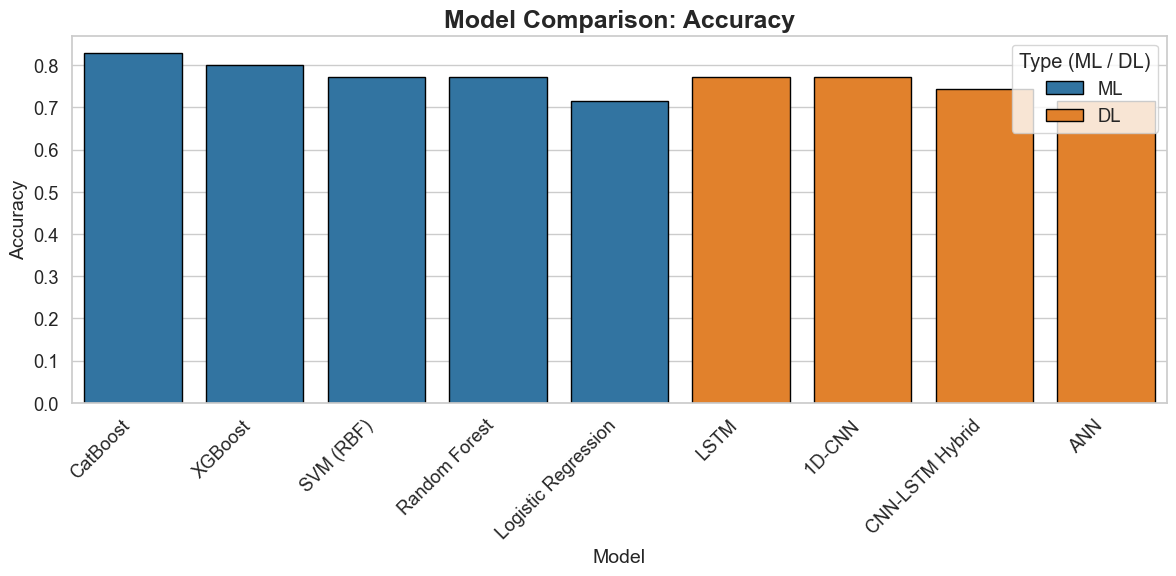

Saved: F1_macro_comparison.png


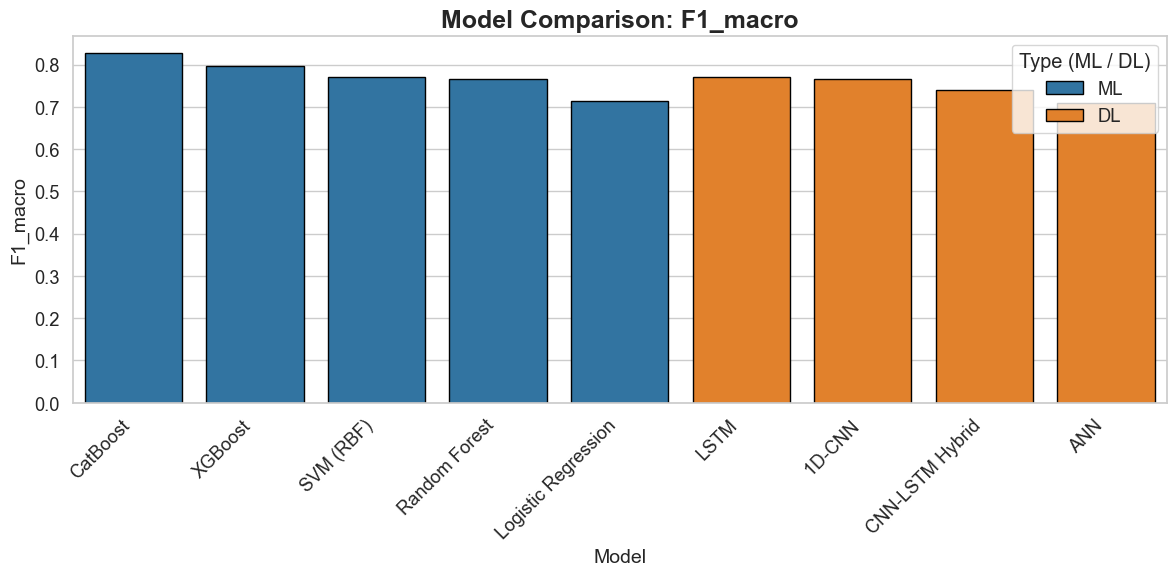

Saved: Recall_macro_comparison.png


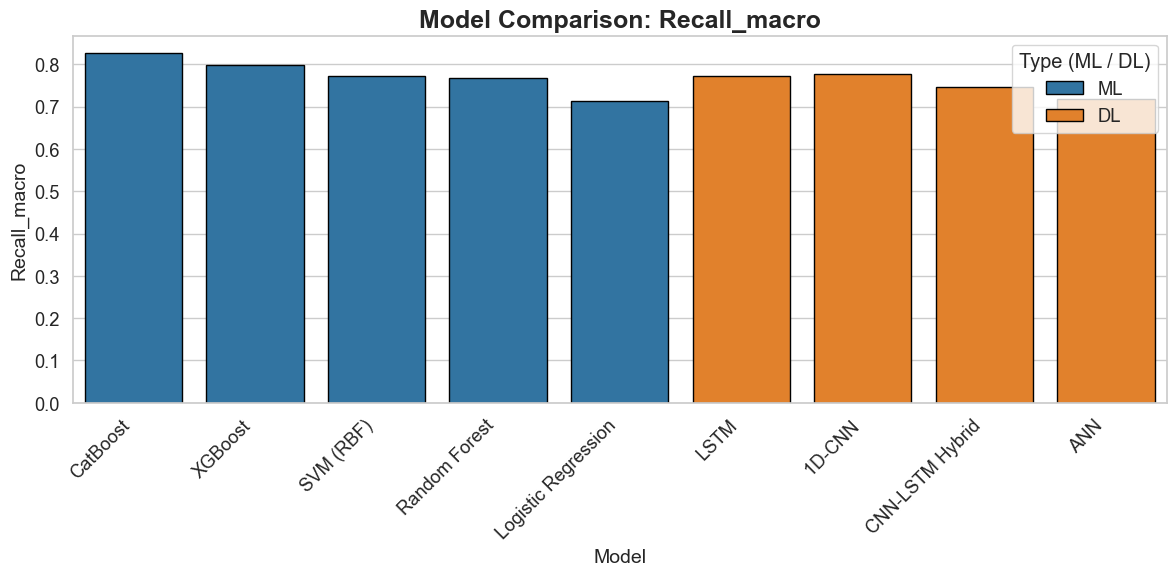

Saved: ROC_AUC_comparison.png


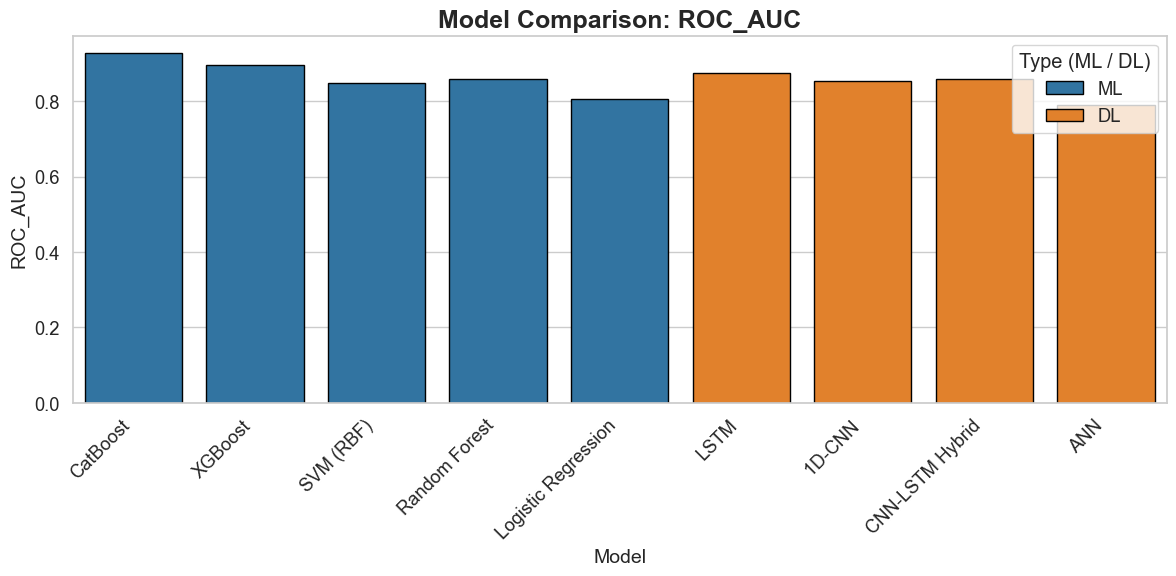

Saved: F1_Healthy_comparison.png


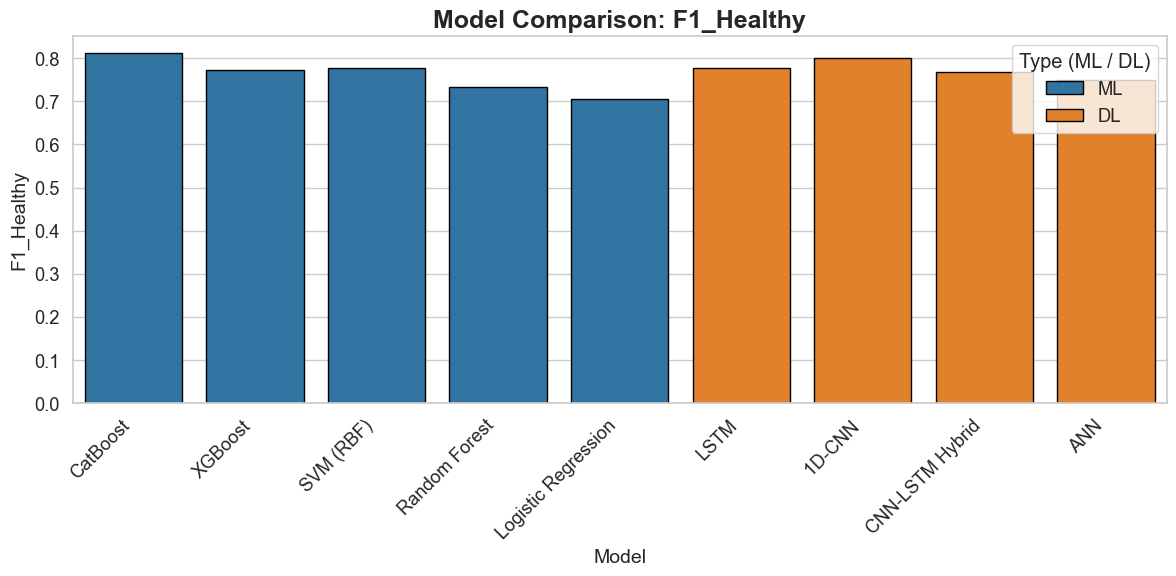

Saved: F1_Alzheimer_comparison.png


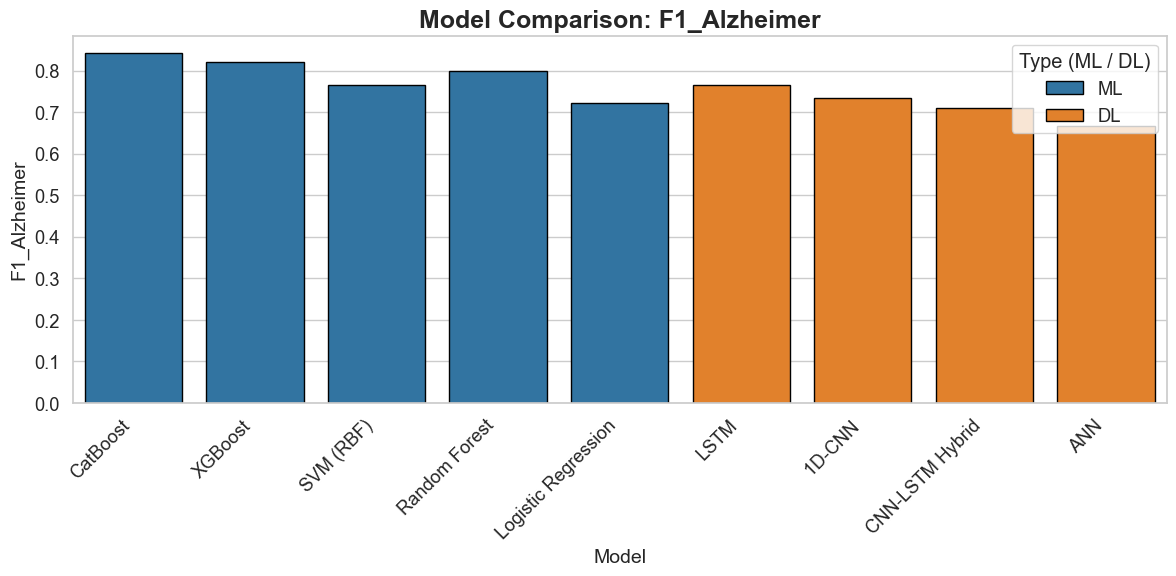

Saved: Recall_Healthy_comparison.png


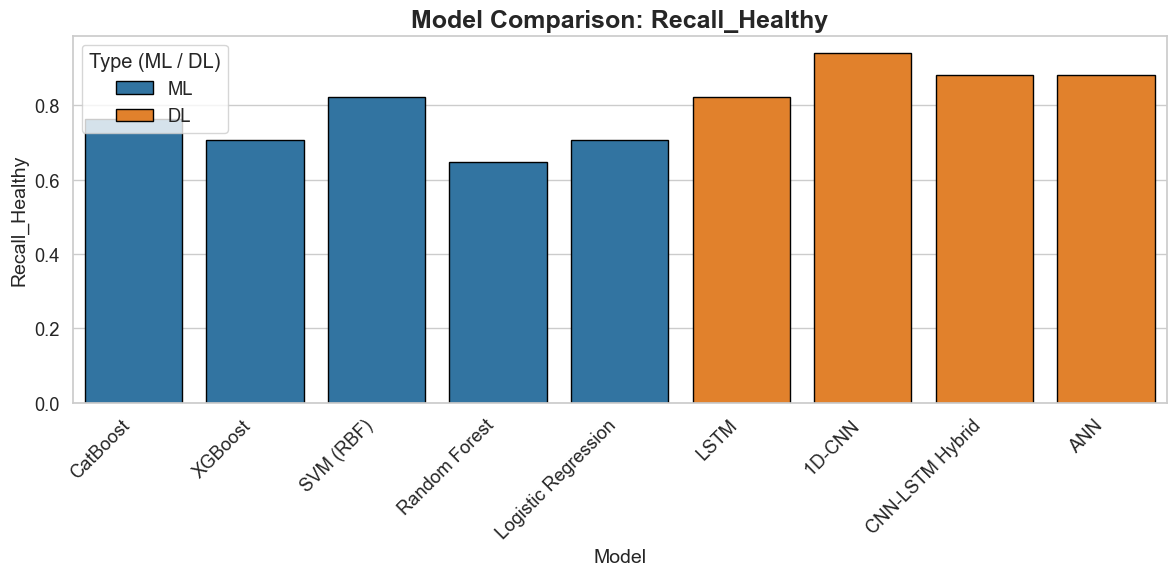

Saved: Recall_Alzheimer_comparison.png


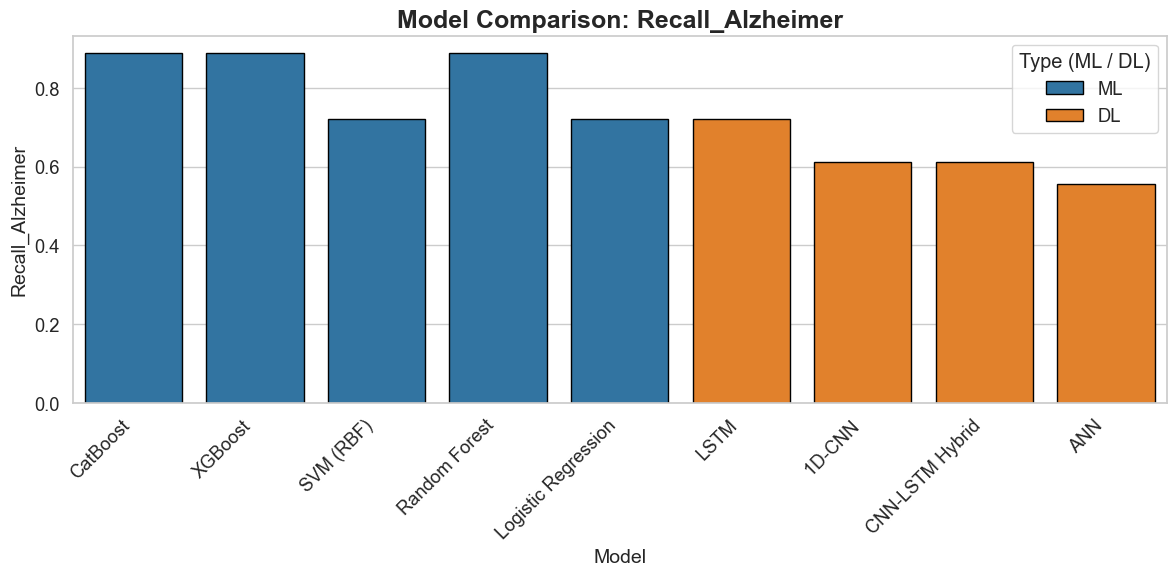

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# DATA
# ===========================

# ML DATA
ml_data = {
    "Model": ["CatBoost", "XGBoost", "SVM (RBF)", "Random Forest", "Logistic Regression"],
    "Accuracy": [0.828571, 0.800000, 0.771429, 0.771429, 0.714286],
    "F1_macro": [0.827303, 0.797353, 0.771242, 0.766667, 0.714052],
    "Recall_macro": [0.826797, 0.797386, 0.772876, 0.767974, 0.714052],
    "ROC_AUC": [0.928105, 0.895425, 0.849673, 0.859477, 0.807190],
    "F1_Healthy": [0.812500, 0.774194, 0.777778, 0.733333, 0.705882],
    "F1_Alzheimer": [0.842105, 0.820513, 0.764706, 0.800000, 0.722222],
    "Recall_Healthy": [0.764706, 0.705882, 0.823529, 0.647059, 0.705882],
    "Recall_Alzheimer": [0.888889, 0.888889, 0.722222, 0.888889, 0.722222]
}
ml_df = pd.DataFrame(ml_data)
ml_df["Type"] = "ML"

# DL DATA
dl_data = {
    "Model": ["LSTM", "1D-CNN", "CNN-LSTM Hybrid", "ANN"],
    "Accuracy": [0.771429, 0.771429, 0.742857, 0.714286],
    "F1_macro": [0.771242, 0.766667, 0.739454, 0.708333],
    "Recall_macro": [0.772876, 0.776144, 0.746732, 0.718954],
    "ROC_AUC": [0.875817, 0.852941, 0.859477, 0.790850],
    "F1_Healthy": [0.777778, 0.800000, 0.769231, 0.750000],
    "F1_Alzheimer": [0.764706, 0.733333, 0.709677, 0.666667],
    "Recall_Healthy": [0.823529, 0.941176, 0.882353, 0.882353],
    "Recall_Alzheimer": [0.722222, 0.611111, 0.611111, 0.555556]
}
dl_df = pd.DataFrame(dl_data)
dl_df["Type"] = "DL"

# COMBINED
df = pd.concat([ml_df, dl_df], ignore_index=True)

# Metrics to plot
metrics = [
    "Accuracy", "F1_macro", "Recall_macro", "ROC_AUC",
    "F1_Healthy", "F1_Alzheimer", "Recall_Healthy", "Recall_Alzheimer"
]

# ===========================
# PLOTTING SETTINGS
# ===========================
sns.set_theme(style="whitegrid", font_scale=1.2)

# Custom color palette for models
palette = sns.color_palette("tab10", n_colors=len(df["Model"].unique()))

# ===========================
# GENERATE & SAVE PLOTS
# ===========================

for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=df,
        x="Model",
        y=metric,
        hue="Type",
        palette="tab10",
        edgecolor="black"
    )

    plt.title(f"Model Comparison: {metric}", fontsize=18, weight="bold")
    plt.xlabel("Model", fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Type (ML / DL)")
    plt.tight_layout()

    # Save high-quality PNG
    filename = f"{metric}_comparison.png"
    plt.savefig(filename, dpi=300)
    print(f"Saved: {filename}")

    plt.show()


In [6]:
# Step 1: Basic inspection (run and paste results)
import pandas as pd
import numpy as np
import os
from pprint import pprint

DATA_PATH = "data.csv"   # <- change this if your file name/path is different

assert os.path.exists(DATA_PATH), f"File not found at {DATA_PATH} (change DATA_PATH if needed)"

df = pd.read_csv(DATA_PATH)
print("File loaded:", DATA_PATH)
print("Shape:", df.shape)
print("\nColumns (first 60 shown):")
pprint(df.columns.tolist()[:60])

print("\n--- First 5 rows ---")
display(df.head())

print("\n--- dtypes ---")
print(df.dtypes.value_counts())
print(df.dtypes)

print("\n--- Missing values (per column, top 30) ---")
mv = df.isna().sum().sort_values(ascending=False).head(30)
print(mv)

print("\n--- Any non-numeric columns (names) ---")
non_numeric = [c for c in df.columns if not pd.api.types.is_numeric_dtype(df[c])]
print(non_numeric)

print("\n--- Class distribution ---")
if 'class' in df.columns:
    print(df['class'].value_counts(dropna=False))
    print("\nClass proportions:")
    print(df['class'].value_counts(normalize=True))
else:
    print("No 'class' column found. Please tell me the name of the label column.")

# Helpful auto-detections for sequence-like groups (1..25 suffix)
print("\n--- Candidate sequence groups (columns ending with digits) ---")
from collections import defaultdict
groups = defaultdict(list)
import re
for c in df.columns:
    m = re.match(r"(.+?)(\d+)$", c)
    if m:
        groups[m.group(1)].append(c)
# show groups with length > 1
for prefix, cols in sorted(groups.items(), key=lambda x: -len(x[1]))[:30]:
    if len(cols) > 1:
        print(f"{prefix} -> {len(cols)} columns (examples): {sorted(cols)[:6]}")


File loaded: data.csv
Shape: (174, 452)

Columns (first 60 shown):
['ID',
 'air_time1',
 'disp_index1',
 'gmrt_in_air1',
 'gmrt_on_paper1',
 'max_x_extension1',
 'max_y_extension1',
 'mean_acc_in_air1',
 'mean_acc_on_paper1',
 'mean_gmrt1',
 'mean_jerk_in_air1',
 'mean_jerk_on_paper1',
 'mean_speed_in_air1',
 'mean_speed_on_paper1',
 'num_of_pendown1',
 'paper_time1',
 'pressure_mean1',
 'pressure_var1',
 'total_time1',
 'air_time2',
 'disp_index2',
 'gmrt_in_air2',
 'gmrt_on_paper2',
 'max_x_extension2',
 'max_y_extension2',
 'mean_acc_in_air2',
 'mean_acc_on_paper2',
 'mean_gmrt2',
 'mean_jerk_in_air2',
 'mean_jerk_on_paper2',
 'mean_speed_in_air2',
 'mean_speed_on_paper2',
 'num_of_pendown2',
 'paper_time2',
 'pressure_mean2',
 'pressure_var2',
 'total_time2',
 'air_time3',
 'disp_index3',
 'gmrt_in_air3',
 'gmrt_on_paper3',
 'max_x_extension3',
 'max_y_extension3',
 'mean_acc_in_air3',
 'mean_acc_on_paper3',
 'mean_gmrt3',
 'mean_jerk_in_air3',
 'mean_jerk_on_paper3',
 'mean_speed_

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P



--- dtypes ---
float64    300
int64      150
object       2
Name: count, dtype: int64
ID                  object
air_time1            int64
disp_index1        float64
gmrt_in_air1       float64
gmrt_on_paper1     float64
                    ...   
paper_time25         int64
pressure_mean25    float64
pressure_var25     float64
total_time25         int64
class               object
Length: 452, dtype: object

--- Missing values (per column, top 30) ---
ID                       0
mean_speed_on_paper16    0
gmrt_in_air18            0
disp_index18             0
air_time18               0
total_time17             0
pressure_var17           0
pressure_mean17          0
paper_time17             0
num_of_pendown17         0
mean_speed_on_paper17    0
mean_speed_in_air17      0
mean_jerk_on_paper17     0
mean_jerk_in_air17       0
mean_gmrt17              0
mean_acc_on_paper17      0
mean_acc_in_air17        0
max_y_extension17        0
max_x_extension17        0
gmrt_on_paper17          0
gmrt

This step performs exploratory data analysis (EDA) to understand feature distributions, relationships, and class separability. It begins by dropping the ID column and encoding the class labels for plotting. Summary statistics provide an overview of feature ranges and variability. Class balance is visualized with a countplot to identify potential imbalances. Correlations between features and the target are examined, highlighting the top 20 predictive features with a heatmap. Dimensionality reduction techniques—PCA and t-SNE—are applied to project high-dimensional data into 2D space, allowing visual inspection of class separability and potential clustering patterns. Overall, this EDA helps guide feature selection, preprocessing decisions, and model design.

=== Basic Statistics ===


,count,mean,std,min,25%,50%,75%,max
air_time1,174.0,5664.166667,12653.772746,65.000000,1697.500000,2890.000000,4931.250000,109965.000000
disp_index1,174.0,0.000010,0.000003,0.000002,0.000008,0.000009,0.000011,0.000028
gmrt_in_air1,174.0,297.666685,183.943181,28.734515,174.153023,255.791452,358.917885,1168.328276
gmrt_on_paper1,174.0,200.504413,111.629546,29.935835,136.524742,176.494494,234.052560,865.210522
max_x_extension1,174.0,1977.965517,1648.306365,754.000000,1362.500000,1681.000000,2082.750000,18602.000000
max_y_extension1,174.0,7323.896552,2188.290512,561.000000,6124.000000,6975.500000,8298.500000,15783.000000
mean_acc_in_air1,174.0,0.416374,0.381837,0.067748,0.218209,0.275184,0.442706,2.772566
mean_acc_on_paper1,174.0,0.179823,0.064693,0.096631,0.146647,0.163659,0.188879,0.627350
mean_gmrt1,174.0,249.085549,132.698462,41.199445,161.136182,224.445268,294.392298,836.784702
mean_jerk_in_air1,174.0,0.067556,0.074776,0.011861,0.029523,0.039233,0.071057,0.543199


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13000\3189639195.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, x="class", palette="coolwarm")


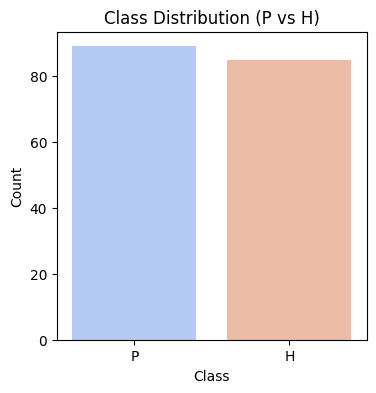

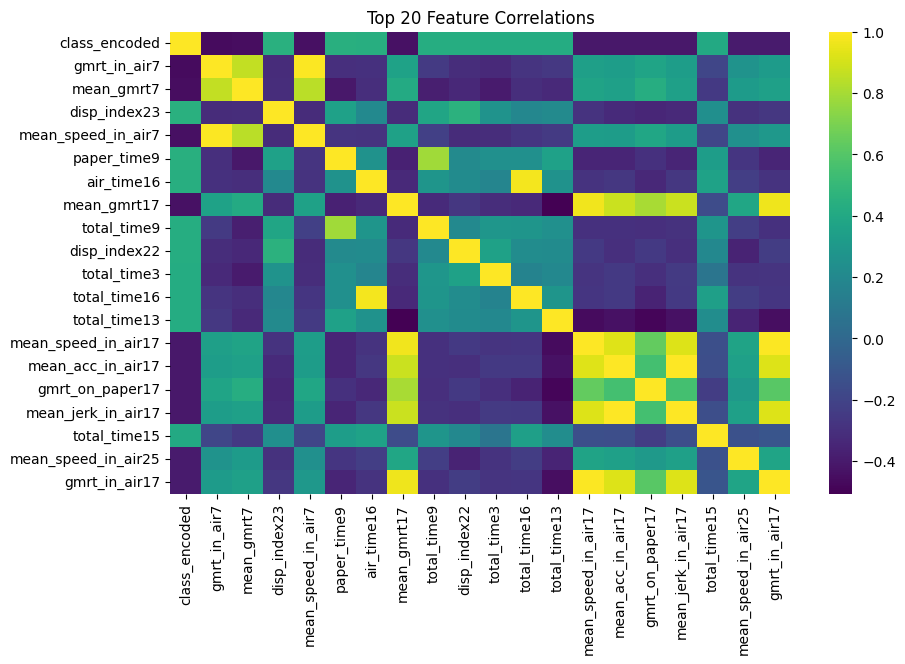

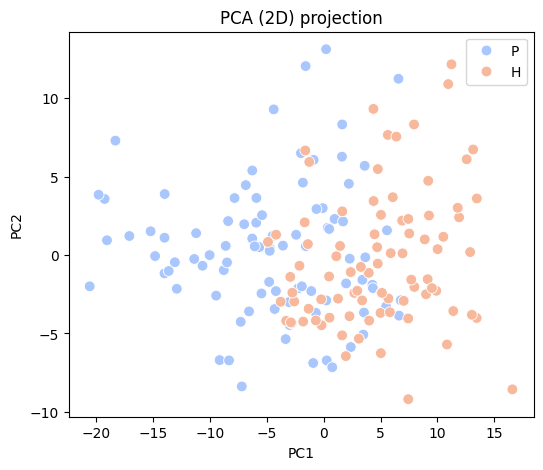

Running t-SNE (may take ~30-60 seconds)...


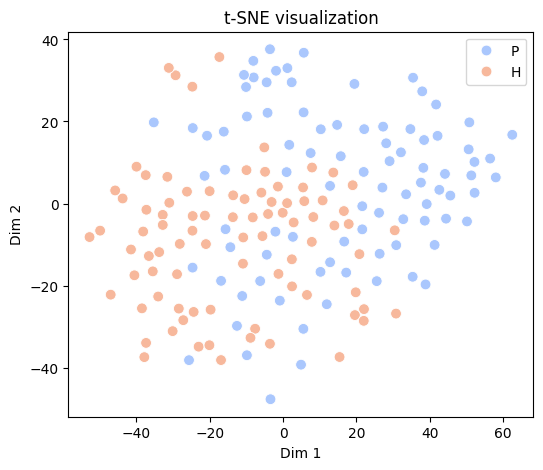

In [7]:
# ============================
# STEP 2 — EXPLORATORY DATA ANALYSIS
# ============================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop ID for EDA
df_eda = df.drop(columns=["ID"]).copy()

# Encode class labels temporarily for plotting
le = LabelEncoder()
df_eda["class_encoded"] = le.fit_transform(df_eda["class"])  # P=1, H=0 (likely)

# --- 1️⃣ Summary stats ---
print("=== Basic Statistics ===")
display(df_eda.describe().T.head(20))

# --- 2️⃣ Class balance ---
plt.figure(figsize=(4,4))
sns.countplot(data=df_eda, x="class", palette="coolwarm")
plt.title("Class Distribution (P vs H)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# --- 3️⃣ Correlation heatmap (top 20 features most correlated with label) ---
corr = df_eda.drop(columns=["class"]).corrwith(df_eda["class_encoded"]).abs().sort_values(ascending=False)
top_corr_features = corr.head(20).index

plt.figure(figsize=(10,6))
sns.heatmap(df_eda[top_corr_features].corr(), annot=False, cmap="viridis")
plt.title("Top 20 Feature Correlations")
plt.show()

# --- 4️⃣ PCA (2 components) ---
features = df_eda.drop(columns=["class", "class_encoded"])
X_scaled = StandardScaler().fit_transform(features)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_eda["class"], palette="coolwarm", s=60)
plt.title("PCA (2D) projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# --- 5️⃣ t-SNE (2D) ---
print("Running t-SNE (may take ~30-60 seconds)...")
X_tsne = TSNE(n_components=2, random_state=42, perplexity=15, learning_rate=200).fit_transform(X_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df_eda["class"], palette="coolwarm", s=60)
plt.title("t-SNE visualization")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend()
plt.show()


This step identifies the features most strongly associated with the target class. First, the class labels are encoded numerically (e.g., P=1, H=0) to allow correlation computation. Then, correlations between all numeric features and the encoded class are calculated and sorted by absolute value. The top 20 features with the highest correlation are displayed and visualized in a horizontal bar plot, highlighting which features are potentially most predictive of Alzheimer’s presence. This analysis helps prioritize features for model input and provides insight into which measurements carry the most discriminatory power.

=== Top 20 Most Correlated Features with Alzheimer’s Class (P vs H) ===


gmrt_in_air7           0.462846
mean_gmrt7             0.457210
disp_index23           0.449566
mean_speed_in_air7     0.447509
paper_time9            0.445284
air_time16             0.440471
mean_gmrt17            0.439019
total_time9            0.429092
disp_index22           0.425910
total_time3            0.423238
total_time16           0.421090
total_time13           0.420247
mean_speed_in_air17    0.410240
mean_acc_in_air17      0.410148
gmrt_on_paper17        0.408198
mean_jerk_in_air17     0.407552
total_time15           0.400314
mean_speed_in_air25    0.398771
gmrt_in_air17          0.396748
mean_speed_in_air23    0.396585
dtype: float64

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13000\515350106.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")


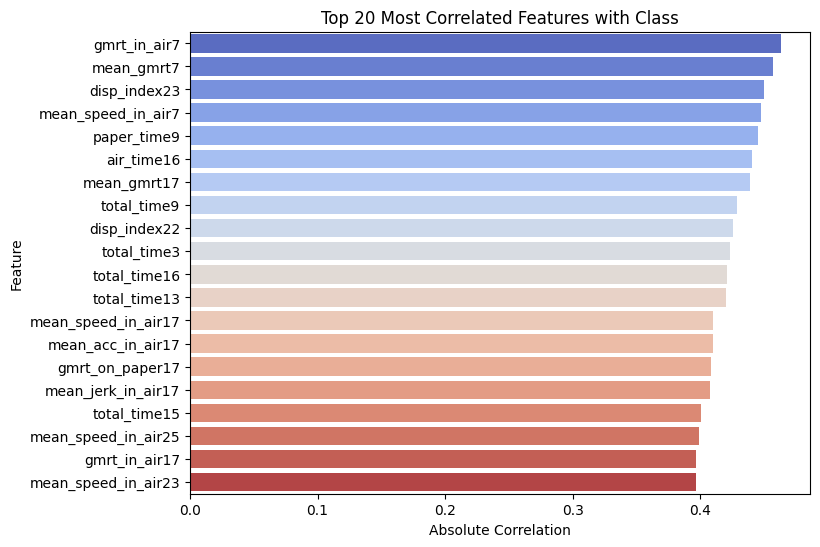

In [8]:
# =====================================
# TOP CORRELATED FEATURES (Full Dataset)
# =====================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Copy to avoid modifying original df
df_corr = df.copy()

# Encode class to numeric (P=1, H=0)
le = LabelEncoder()
df_corr["class_encoded"] = le.fit_transform(df_corr["class"])

# Compute correlation of all numeric features with class
numeric_cols = df_corr.select_dtypes(include=["float64", "int64"]).columns
corr_with_class = df_corr[numeric_cols].corrwith(df_corr["class_encoded"])

# Sort by absolute correlation
corr_sorted = corr_with_class.abs().sort_values(ascending=False)

# Display top 20
top_corr = corr_sorted.head(20)
print("=== Top 20 Most Correlated Features with Alzheimer’s Class (P vs H) ===")
display(top_corr)

# --- Plot ---
plt.figure(figsize=(8,6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")
plt.title("Top 20 Most Correlated Features with Class")
plt.xlabel("Absolute Correlation")
plt.ylabel("Feature")
plt.show()


This step performs comprehensive preprocessing to prepare the Alzheimer’s dataset for both traditional ML and deep learning models. First, non-feature columns (like IDs) are removed and the class labels are encoded numerically (Healthy=0, Patient=1). Features are then standardized using StandardScaler to ensure all metrics contribute equally. The dataset is split into training, validation, and test sets with stratification to preserve class balance. For deep learning models, the flat feature vectors are reshaped into 3D sequences representing multiple strokes per sample (samples × strokes × features per stroke), which is crucial for models like CNNs or LSTMs that leverage temporal/spatial patterns. This pipeline ensures clean, scaled, and properly structured inputs for both ML and DL workflows, enabling consistent training and evaluation.

In [9]:
# ================================================
# 🔧 STEP 3: FULL PREPROCESSING PIPELINE
# For Alzheimer’s Prediction (Darwin Dataset)
# ================================================

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# --- 1️⃣ Basic Cleaning ---
df_clean = df.copy()

# Drop non-feature columns
if "ID" in df_clean.columns:
    df_clean.drop(columns=["ID"], inplace=True)

# Encode class (Healthy=0, Patient=1)
le = LabelEncoder()
df_clean["class"] = le.fit_transform(df_clean["class"])  # H=0, P=1

# Separate features and target
X = df_clean.drop(columns=["class"])
y = df_clean["class"]

print(f"✅ Data shape before processing: {X.shape}")
print(f"✅ Labels: {y.unique()}")

# --- 2️⃣ Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3️⃣ Train/Validation/Test Split ---
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"✅ Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

# --- 4️⃣ Prepare 3D Sequence Data for Deep Learning ---
# Each sample has 25 strokes; each stroke has multiple metrics.
# We’ll reshape from (samples, total_features) → (samples, 25, features_per_stroke)

# Infer stroke structure
num_strokes = 25
features_per_stroke = X_train.shape[1] // num_strokes

def reshape_to_sequence(X_flat):
    return X_flat.reshape(X_flat.shape[0], num_strokes, features_per_stroke)

X_train_seq = reshape_to_sequence(X_train)
X_val_seq = reshape_to_sequence(X_val)
X_test_seq = reshape_to_sequence(X_test)

print(f"✅ Sequence shape for DL models: {X_train_seq.shape} (samples, 25, {features_per_stroke})")

# --- 5️⃣ Output summary ---
print("\n=== ✅ Preprocessing Complete ===")
print(f"ML Input Shape: {X_train.shape}")
print(f"DL Input Shape: {X_train_seq.shape}")
print(f"Features per stroke: {features_per_stroke}")


✅ Data shape before processing: (174, 450)
✅ Labels: [1 0]
✅ Training set: (121, 450), Validation set: (26, 450), Test set: (27, 450)
✅ Sequence shape for DL models: (121, 25, 18) (samples, 25, 18)

=== ✅ Preprocessing Complete ===
ML Input Shape: (121, 450)
DL Input Shape: (121, 25, 18)
Features per stroke: 18


This section performs exploratory data analysis (EDA) to understand class balance, feature distributions, and latent structure in the Alzheimer’s dataset. The class labels are encoded numerically (Healthy=0, Patient=1) and non-feature columns like IDs are removed. Features are standardized to ensure comparability across scales. Class distribution is visualized with a count plot, confirming relative balance. Key features are visualized with boxplots to highlight differences between classes. PCA is applied to reduce dimensionality, and multiple component pairs are plotted to check if linear projections separate classes. Finally, t-SNE is applied on PCA-reduced data (50 components) to capture non-linear relationships and visualize 2D separation, helping assess if features contain discriminative patterns suitable for ML/DL models.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13000\853248309.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="coolwarm")
C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


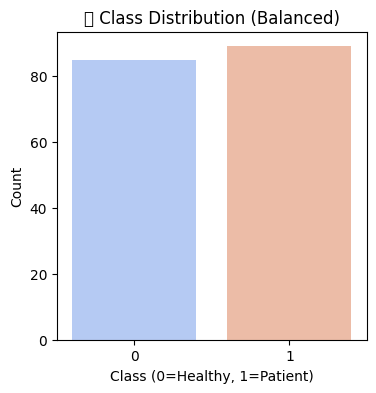

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13000\853248309.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_eda['class'], y=df_eda[col], palette="coolwarm")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13000\853248309.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_eda['class'], y=df_eda[col], palette="coolwarm")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13000\853248309.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_eda['class'], y=df_eda[col], palette="coolwarm")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13

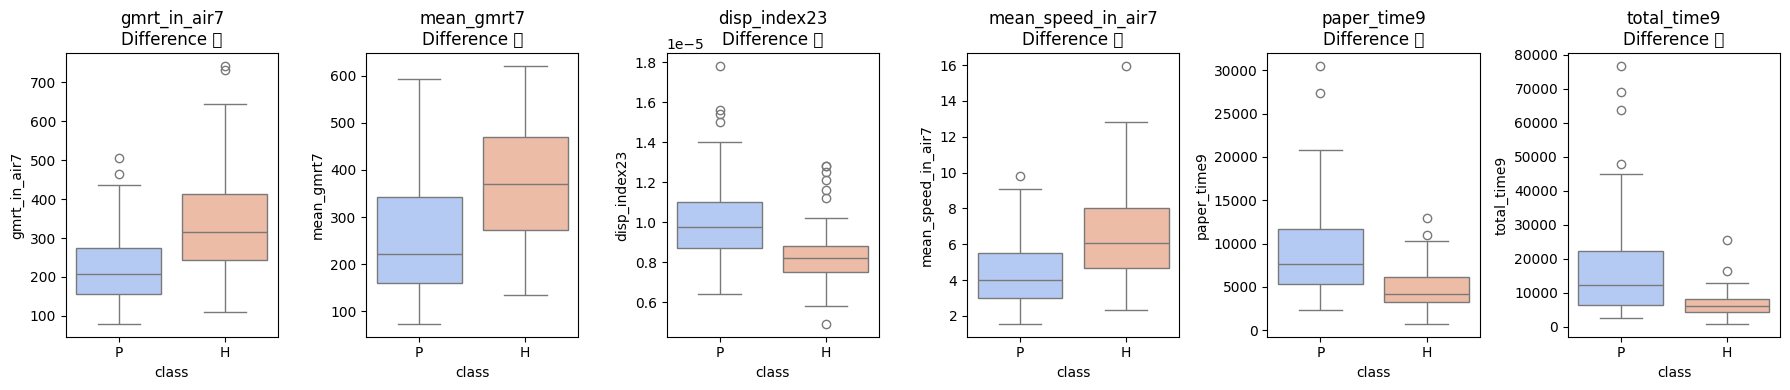

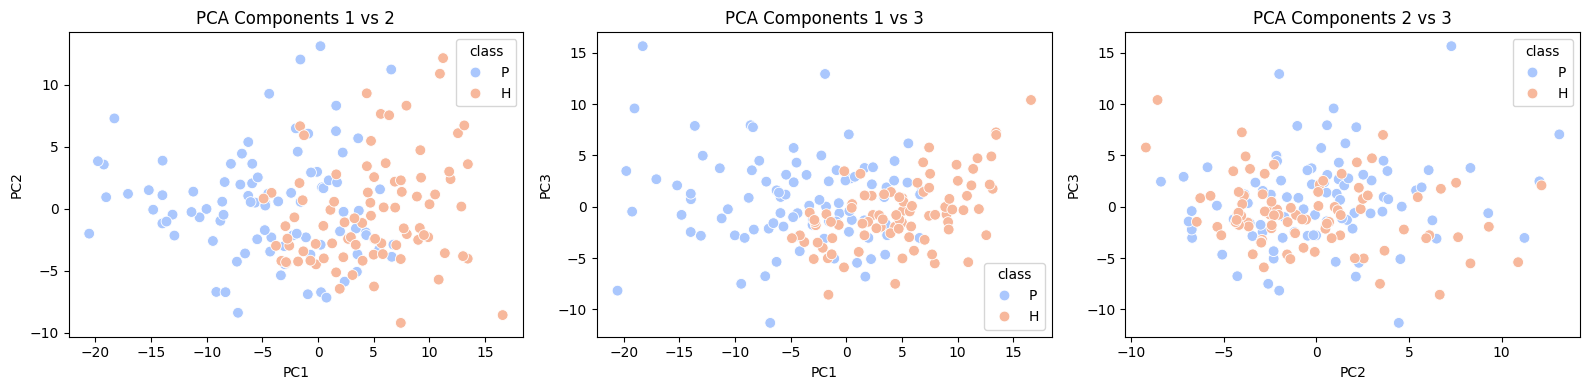

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


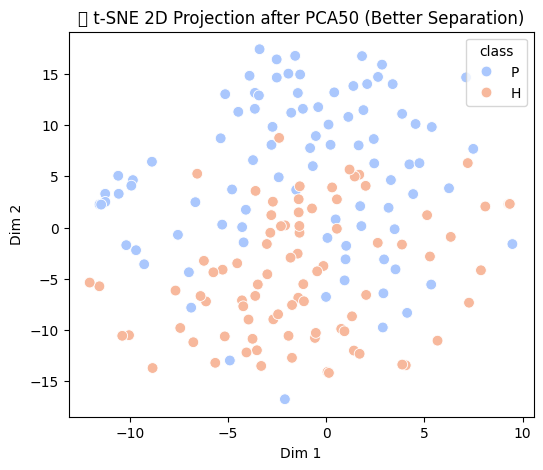

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder

# ===============================
# 1️⃣ Prepare Data for EDA
# ===============================
df_eda = df.copy()

# Encode class (Healthy=0, Patient=1)
le = LabelEncoder()
df_eda['class_encoded'] = le.fit_transform(df_eda['class'])

# Drop ID column
if 'ID' in df_eda.columns:
    df_eda.drop(columns=['ID'], inplace=True)

# Separate features and target
X = df_eda.drop(columns=['class', 'class_encoded'])
y = df_eda['class_encoded']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===============================
# 2️⃣ Class Distribution
# ===============================
plt.figure(figsize=(4,4))
sns.countplot(x=y, palette="coolwarm")
plt.title("✅ Class Distribution (Balanced)")
plt.xlabel("Class (0=Healthy, 1=Patient)")
plt.ylabel("Count")
plt.show()

# ===============================
# 3️⃣ Boxplots of Top Features
# ===============================
top_features = ["gmrt_in_air7", "mean_gmrt7", "disp_index23", 
                "mean_speed_in_air7", "paper_time9", "total_time9"]

plt.figure(figsize=(18,4))
for i, col in enumerate(top_features, 1):
    plt.subplot(1, len(top_features), i)
    sns.boxplot(x=df_eda['class'], y=df_eda[col], palette="coolwarm")
    plt.title(f"{col}\nDifference ✅")
plt.tight_layout()
plt.show()

# ===============================
# 4️⃣ PCA with Multiple Component Pairs
# ===============================
pca = PCA(n_components=10, random_state=42)
X_pca10 = pca.fit_transform(X_scaled)

pairs = [(0,1), (0,2), (1,2)]
plt.figure(figsize=(16,4))
for i, (x_idx, y_idx) in enumerate(pairs,1):
    plt.subplot(1,3,i)
    sns.scatterplot(x=X_pca10[:,x_idx], y=X_pca10[:,y_idx], hue=df_eda['class'], palette="coolwarm", s=60)
    plt.title(f"PCA Components {x_idx+1} vs {y_idx+1}")
    plt.xlabel(f"PC{x_idx+1}")
    plt.ylabel(f"PC{y_idx+1}")
plt.tight_layout()
plt.show()

# ===============================
# 5️⃣ t-SNE after PCA50
# ===============================
pca50 = PCA(n_components=50, random_state=42)
X_pca50 = pca50.fit_transform(X_scaled)

tsne = TSNE(n_components=2, perplexity=15, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_pca50)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df_eda['class'], palette="coolwarm", s=60)
plt.title("✅ t-SNE 2D Projection after PCA50 (Better Separation)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()


This section evaluates feature importance using SHAP values with an XGBoost classifier. The dataset is split into training and test sets, and an XGBoost model is trained to predict Alzheimer’s class. SHAP (SHapley Additive exPlanations) is used to quantify each feature’s contribution to the model’s predictions. A summary bar plot visualizes the top 20 features by their mean absolute SHAP values, providing an intuitive sense of which features most influence the model. Additionally, a textual ranking of features is printed for precise inspection. This approach helps identify the most predictive features and can guide feature selection or further analysis in ML and DL pipelines.

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:13:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


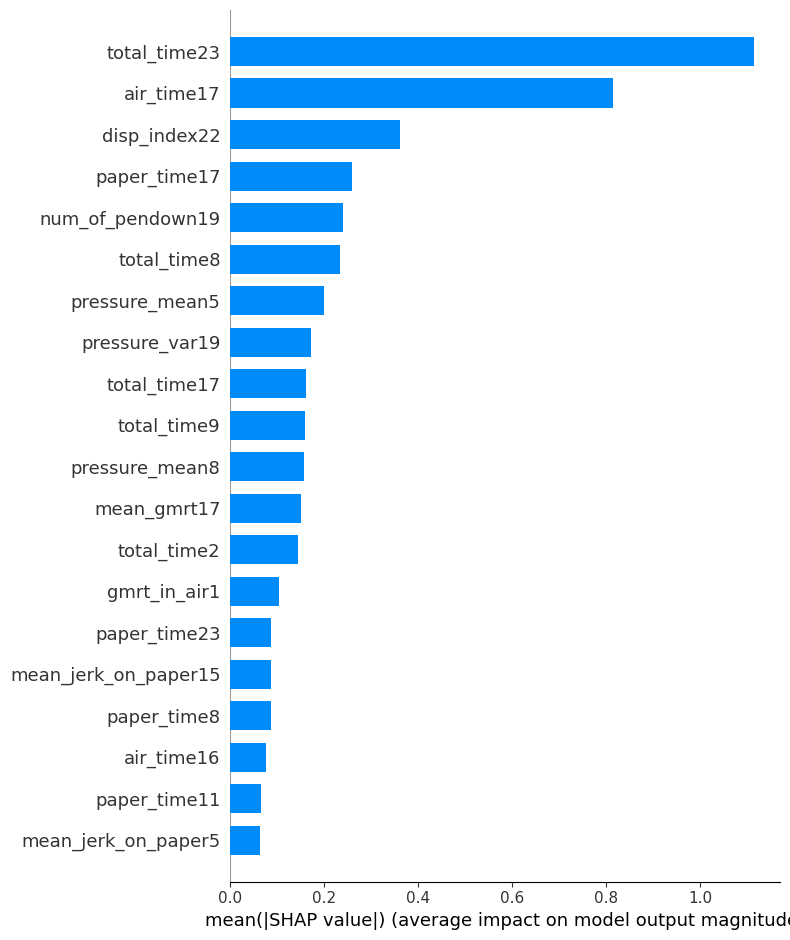

=== Top Features by SHAP Importance ===
             feature  mean_abs_shap
        total_time23       1.114310
          air_time17       0.815456
        disp_index22       0.360357
        paper_time17       0.259045
    num_of_pendown19       0.239412
         total_time8       0.233275
      pressure_mean5       0.200279
      pressure_var19       0.171198
        total_time17       0.160064
         total_time9       0.158501
      pressure_mean8       0.156234
         mean_gmrt17       0.149743
         total_time2       0.144094
        gmrt_in_air1       0.103632
        paper_time23       0.087412
mean_jerk_on_paper15       0.086883
         paper_time8       0.086234
          air_time16       0.075988
        paper_time11       0.066131
 mean_jerk_on_paper5       0.062795


In [11]:
# ===============================
# SHAP Feature Importance (Text + Plot)
# ===============================
import shap
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ML-ready data
X_ml = X_scaled
y_ml = y

# Train/test split
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(
    X_ml, y_ml, test_size=0.2, stratify=y_ml, random_state=42
)

# Train XGBoost
model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train_ml, y_train_ml)

# SHAP explainer
explainer = shap.Explainer(model, X_train_ml)
shap_values = explainer(X_test_ml)

# 1️⃣ Plot top 20 features (visual)
shap.summary_plot(shap_values, X_test_ml, feature_names=X.columns, plot_type="bar", max_display=20)

# 2️⃣ Get textual ranking of top features
shap_abs_mean = pd.DataFrame({
    "feature": X.columns,
    "mean_abs_shap": np.abs(shap_values.values).mean(axis=0)
})

shap_abs_mean_sorted = shap_abs_mean.sort_values(by="mean_abs_shap", ascending=False)
print("=== Top Features by SHAP Importance ===")
print(shap_abs_mean_sorted.head(20).to_string(index=False))


This section visualizes and reports the top 10 most important features as determined by SHAP values for the Alzheimer’s dataset. Using the preprocessed data, boxplots are drawn for each top SHAP feature to show the distribution differences between Healthy (0) and Patient (1) classes, highlighting how these features discriminate between the groups. Additionally, a table of mean absolute SHAP values is presented to quantify feature importance, providing an interpretable ranking of which features contribute most to the model’s predictions. This step aids both feature understanding and model explainability.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13000\1649495255.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_vis['class'], y=df_vis[feat], palette="coolwarm")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13000\1649495255.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_vis['class'], y=df_vis[feat], palette="coolwarm")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13000\1649495255.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_vis['class'], y=df_vis[feat], palette="coolwarm")
C:\Users\ADMIN\AppData\Local\Temp\ipyker

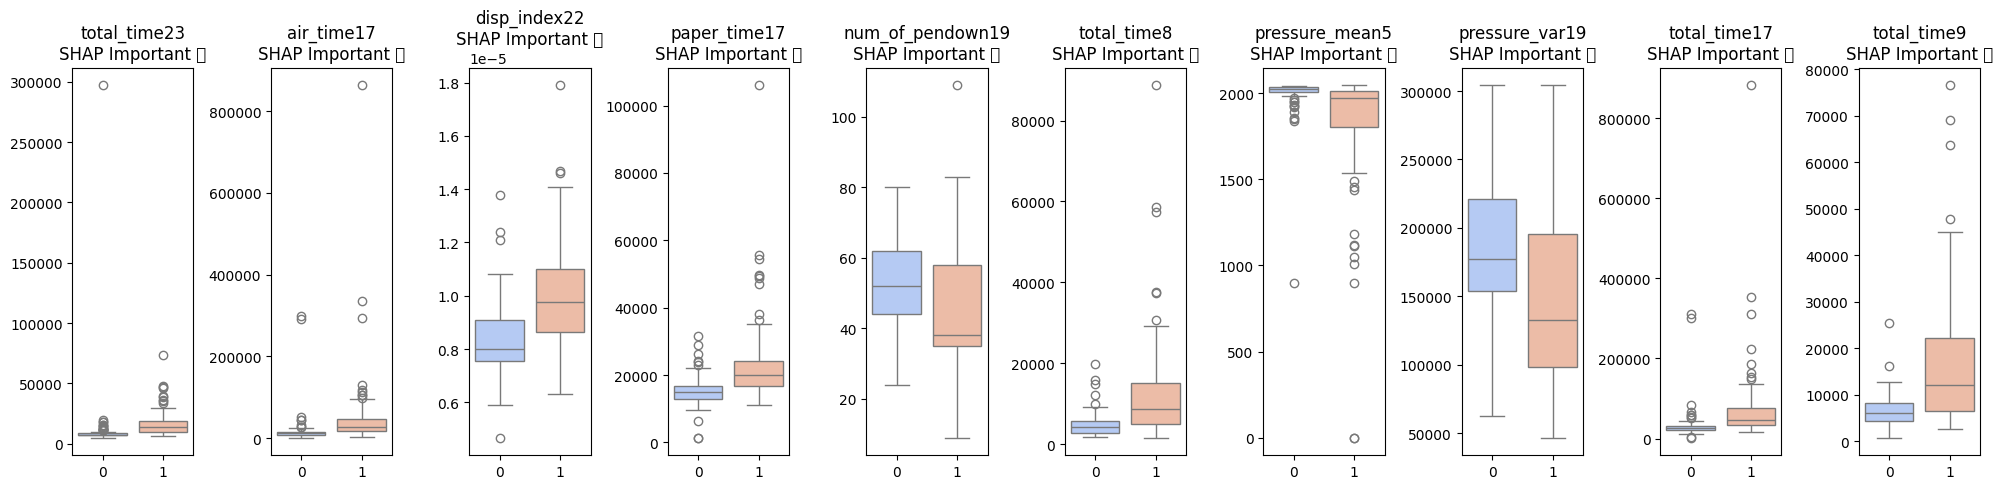

=== Top 10 SHAP Features Table ===
         Feature  Mean_abs_SHAP
    total_time23       1.114310
      air_time17       0.815456
    disp_index22       0.360357
    paper_time17       0.259045
num_of_pendown19       0.239412
     total_time8       0.233275
  pressure_mean5       0.200279
  pressure_var19       0.171198
    total_time17       0.160064
     total_time9       0.158501


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Copy preprocessed df
df_vis = df_clean.copy()

# Top 10 features from SHAP (you can adjust if needed)
top_shap_features = [
    "total_time23", "air_time17", "disp_index22", "paper_time17", "num_of_pendown19",
    "total_time8", "pressure_mean5", "pressure_var19", "total_time17", "total_time9"
]

# Create figure
plt.figure(figsize=(20,5))

for i, feat in enumerate(top_shap_features, 1):
    plt.subplot(1, len(top_shap_features), i)
    sns.boxplot(x=df_vis['class'], y=df_vis[feat], palette="coolwarm")
    plt.title(f"{feat}\nSHAP Important ✅")
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout()
plt.show()

# Also create a textual table for report
shap_values_top = pd.DataFrame({
    "Feature": top_shap_features,
    "Mean_abs_SHAP": [
        1.114310, 0.815456, 0.360357, 0.259045, 0.239412,
        0.233275, 0.200279, 0.171198, 0.160064, 0.158501
    ]
})

print("=== Top 10 SHAP Features Table ===")
print(shap_values_top.to_string(index=False))
